In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
data = pd.read_csv("2017_jun_final - 2017_jun_final.csv")

#  Odczytaj tabelę wynikową przy użyciu metody head


In [3]:
print(data.head())


   N                      Role Programming language Specialisation   \
0  1        Junior QA engineer                  NaN       Manual QA   
1  2        Junior QA engineer                  NaN       Manual QA   
2  3         Software Engineer              C#/.NET             NaN   
3  4         Software Engineer           JavaScript             NaN   
4  5  Senior Software Engineer           JavaScript             NaN   

         Experience  Experience on current job  Salary/month  \
0                0.5                       0.5           400   
1  loss then 3 month         loss then 3 month           430   
2                  4                         1          2500   
3                  5                         4          2000   
4               10+                        0.5          4500   

   Изменение.зарплаты.за.12.месяцев       City              Company size  ...  \
0                                 0  New York         up to 10 employees  ...   
1                         

#  Zdefiniuj rozmiar tabeli przy użyciu metody shape


In [4]:
print(data.shape)

(8704, 25)


#  Zdefiniuj typy wszystkich kolumn za pomocą metody dataframe.dtypes


In [5]:
print(data.dtypes)


N                                     int64
Role                                 object
Programming language                 object
Specialisation                       object
Experience                           object
Experience on current job            object
Salary/month                          int64
Изменение.зарплаты.за.12.месяцев      int64
City                                 object
Company size                         object
Company type                         object
Gender                               object
Age                                   int64
Education                            object
University                           object
Still student                          bool
English                              object
Subject.area                         object
Date                                 object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

#  Oblicz proporcję spacji w każdej kolumnie (użyj metod isnull i sum).


In [6]:
null_percentage = data.isnull().mean() * 100
print(null_percentage)

N                                    0.000000
Role                                 0.000000
Programming language                44.232537
Specialisation                      82.938879
Experience                           0.000000
Experience on current job            0.000000
Salary/month                         0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
City                                 0.000000
Company size                         0.000000
Company type                         0.000000
Gender                               0.000000
Age                                  0.000000
Education                            0.000000
University                          17.761949
Still student                        0.000000
English                              0.000000
Subject.area                         2.562040
Date                                 0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

#  Usuń wszystkie kolumny ze spacjami z wyjątkiem kolumny "Język programowania"


In [8]:
columns_to_keep = ['Programming language']
data_cleaned = data.dropna(axis=1, thresh=1).copy()
data_cleaned = data_cleaned[columns_to_keep + [col for col in data_cleaned.columns if col not in columns_to_keep and data_cleaned[col].isnull().sum() == 0]]


#  Ponownie policz odsetek pustych miejsc w każdej kolumnie


In [9]:
new_null_percentage = data_cleaned.isnull().mean() * 100
print(new_null_percentage)

Programming language                44.232537
N                                    0.000000
Role                                 0.000000
Experience                           0.000000
Experience on current job            0.000000
Salary/month                         0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
City                                 0.000000
Company size                         0.000000
Company type                         0.000000
Gender                               0.000000
Age                                  0.000000
Education                            0.000000
Still student                        0.000000
English                              0.000000
Date                                 0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


#  Usuń wszystkie wiersze z oryginalnej tabeli za pomocą metody dropna


In [10]:
data_dropped = data.dropna()


#  Zdefiniuj nowy rozmiar tabeli przy użyciu metody shape


In [11]:
print(data_dropped.shape)


(0, 25)


#  Utwórz nową tabelę python_data, która będzie zawierać tylko wiersze ze specjalistami, którzy podali język programowania Python


In [13]:
python_data = data_dropped[data_dropped['Programming language'].str.contains('Python', na=False)]


#  Zdefiniuj rozmiar tabeli python_data za pomocą metody shape


In [14]:
print(python_data.shape)


(0, 25)


#  Używając metody groupby, pogrupuj według kolumny "Stanowisko"


In [16]:
grouped = python_data.groupby('Role')


#  Utwórz nowy DataFrame, w którym dla danych pogrupowanych według kolumny "Role" wykonaj agregację danych za pomocą metody agg i znajdź minimalne i maksymalne wartości w kolumnie "Salary/month"


In [18]:
salary_stats = grouped['Salary/month'].agg(['min', 'max'])
print(salary_stats)


Empty DataFrame
Columns: [min, max]
Index: []


#  Utwórz funkcję fill_avg_salary, która zwróci średnią miesięczną pensję. Użyj jej w metodzie apply i utwórz nową kolumnę "avg"


In [20]:
def fill_avg_salary(row):
    return (row['min'] + row['max']) / 2

salary_stats['avg'] = salary_stats.apply(fill_avg_salary, axis=1)


#  Utwórz statystyki opisowe za pomocą metody describe dla nowej kolumny


In [21]:
print(salary_stats['avg'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg, dtype: float64


#  Zapisz wynikową tabelę w pliku CSV


In [22]:
salary_stats.to_csv('score_salaries.csv', index=True)


# Wykres słupkowy - liczba programistów dla każdego języka programowania


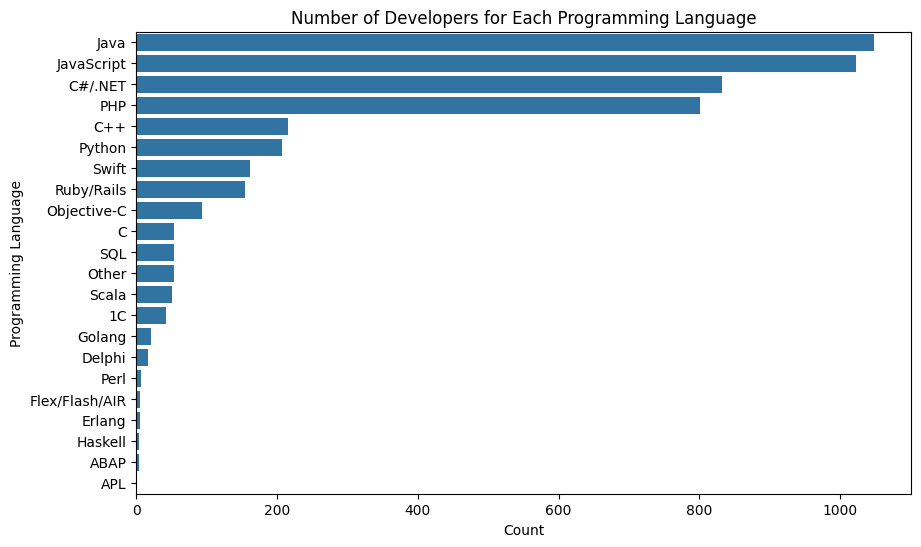

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Programming language', data=data, order=data['Programming language'].value_counts().index)
plt.title('Number of Developers for Each Programming Language')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()

# Wykres kołowy - rozkład języków programowania


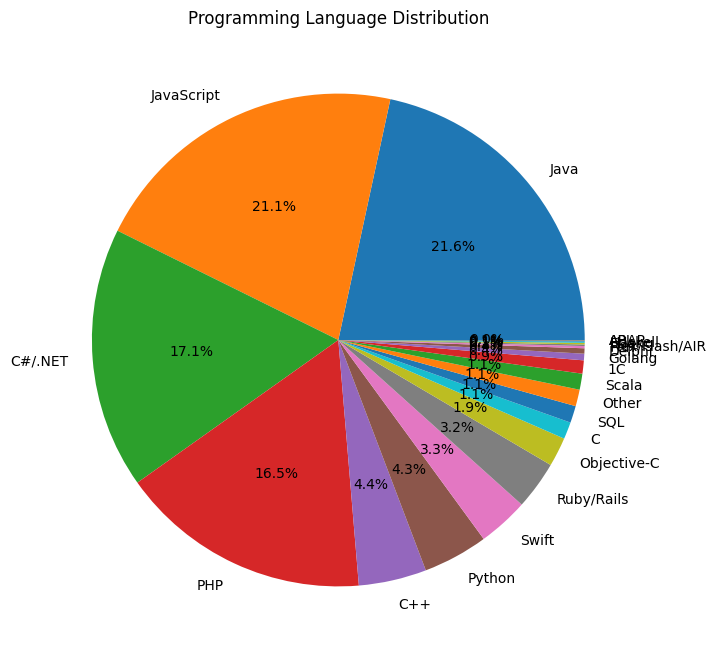

In [33]:
plt.figure(figsize=(8, 8))
data['Programming language'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Programming Language Distribution')
plt.ylabel('')
plt.show()

# Wykres punktowy - wynagrodzenie w zależności od języka programowania


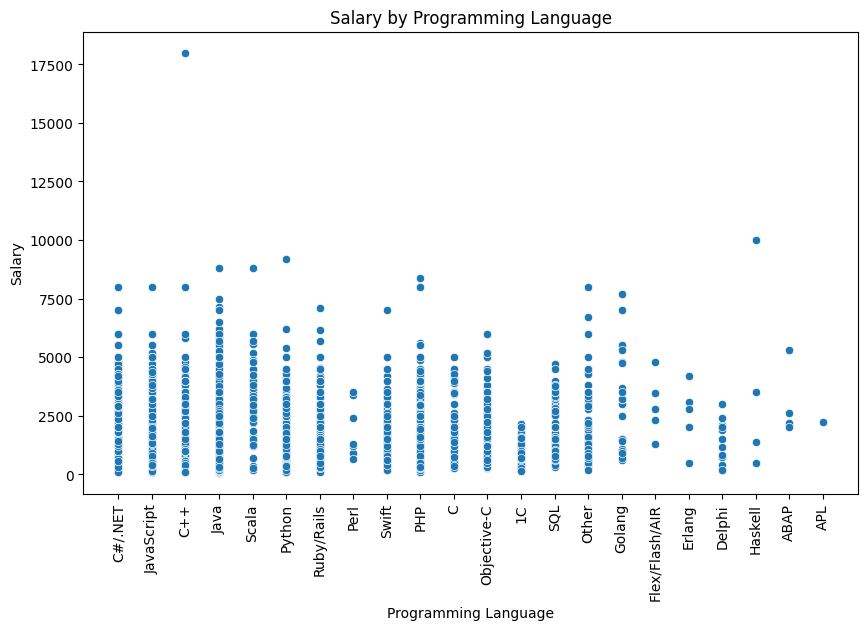

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Programming language', y='Salary/month', data=data)
plt.title('Salary by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()